In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
# dataPos = pd.read_csv('dataset/pos_cleaned_25k_yelp.csv')
# dataNeg = pd.read_csv('dataset/neg_cleaned_25k_yelp.csv')
# dataAvg = pd.read_csv('dataset/avg_cleaned_25k_yelp.csv')

In [5]:
dataAll = pd.read_csv('dataset/data_with_tags.csv')

In [6]:
dataAll.head()

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0


In [7]:
dataAll.shape

(526121, 7)

In [4]:
# def applyUsefulness(useful):
#     if useful < 4:
#         return 'low'
#     if useful >= 4 and useful <8:
#         return 'medium'
#     if useful >= 8:
#         return 'high'
# UsefulnessColumn = dataAll['useful']
# Usefulness = UsefulnessColumn.map(applyUsefulness)
# dataAll['UsefulnessPolarity'] = Usefulness 
# dataAll['UsefulnessPolarity'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:

def applyUsefulness(useful):
    if useful < 2:
        return 0 #return 'low'
    
    return 1 #return 'high'
UsefulnessColumn = dataAll['Useful']
Usefulness = UsefulnessColumn.map(applyUsefulness)
dataAll['UsefulnessPolarity'] = Usefulness 
dataAll['UsefulnessPolarity'].unique()

array([1, 0], dtype=int64)

In [11]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dataAll['Review'])
print(X_train_counts.shape)

(526121, 192037)


In [12]:
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(data_tfidf.shape)

(526121, 192037)


In [13]:
train_set, test_set = train_test_split(dataAll, test_size = 0.5, random_state = 1) 

In [14]:
tc_counts = count_vect.transform(train_set['Review'])
print(tc_counts.shape)
X_train_tfidf = tfidf_transformer.fit_transform(tc_counts)
print(X_train_tfidf.shape)

(263060, 192037)
(263060, 192037)


In [17]:
clfPre = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(X_train_tfidf, train_set['Useful'])

In [18]:
res = clfPre.predict(data_tfidf)

In [19]:
res.shape

(526121,)

In [20]:
dataAll['gradefromtext']=res

In [21]:
dataAll.head(20)

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs,UsefulnessPolarity,gradefromtext
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0,1,0
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0,1,0
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0,1,0
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0,0,0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0,0,0
5,hauled tukas way monroeville girls night two l...,1,1,392,24.0,14.0,10.0,0,0
6,finally civilization arrives champaign urbana,1,1,45,1.0,2.0,1.0,0,0
7,rough november today started positve day car d...,1,0,462,34.0,9.0,22.0,0,0
8,went buck badger last saturday lunch business ...,1,0,586,38.0,25.0,23.0,0,0
9,place horrible everything bartender could not ...,-1,0,231,21.0,7.0,6.0,0,0


In [22]:
## We get a sentimental result from the text

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
import catboost
model = catboost.CatBoostClassifier()
model.fit(X_train_tfidf, train_set['UsefulnessPolarity'],use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.081096
0:	learn: 0.6739271	total: 8.48s	remaining: 2h 21m 11s
1:	learn: 0.6577380	total: 15.8s	remaining: 2h 11m 44s
2:	learn: 0.6441900	total: 18.6s	remaining: 1h 43m 6s
3:	learn: 0.6328967	total: 22s	remaining: 1h 31m 12s
4:	learn: 0.6236412	total: 24s	remaining: 1h 19m 41s
5:	learn: 0.6151692	total: 26.2s	remaining: 1h 12m 20s
6:	learn: 0.6080164	total: 28.4s	remaining: 1h 7m 12s
7:	learn: 0.6022296	total: 30.6s	remaining: 1h 3m 18s
8:	learn: 0.5970450	total: 32.8s	remaining: 1h 13s
9:	learn: 0.5924674	total: 34.9s	remaining: 57m 32s
10:	learn: 0.5885963	total: 36.9s	remaining: 55m 13s
11:	learn: 0.5852059	total: 38.9s	remaining: 53m 26s
12:	learn: 0.5823549	total: 41s	remaining: 51m 49s
13:	learn: 0.5798701	total: 43s	remaining: 50m 27s
14:	learn: 0.5776007	total: 45s	remaining: 49m 14s
15:	learn: 0.5755036	total: 47.1s	remaining: 48m 14s
16:	learn: 0.5736815	total: 49.1s	remaining: 47m 18s
17:	learn: 0.5721687	total: 51s	remaining: 46m 23s
18:	learn: 0.57069

152:	learn: 0.5435789	total: 5m 12s	remaining: 28m 50s
153:	learn: 0.5435174	total: 5m 14s	remaining: 28m 48s
154:	learn: 0.5434636	total: 5m 16s	remaining: 28m 47s
155:	learn: 0.5434003	total: 5m 18s	remaining: 28m 45s
156:	learn: 0.5433448	total: 5m 20s	remaining: 28m 42s
157:	learn: 0.5432823	total: 5m 22s	remaining: 28m 40s
158:	learn: 0.5432233	total: 5m 24s	remaining: 28m 37s
159:	learn: 0.5431522	total: 5m 26s	remaining: 28m 35s
160:	learn: 0.5430877	total: 5m 28s	remaining: 28m 32s
161:	learn: 0.5430232	total: 5m 30s	remaining: 28m 29s
162:	learn: 0.5429560	total: 5m 32s	remaining: 28m 27s
163:	learn: 0.5428879	total: 5m 34s	remaining: 28m 24s
164:	learn: 0.5428222	total: 5m 36s	remaining: 28m 22s
165:	learn: 0.5427634	total: 5m 38s	remaining: 28m 20s
166:	learn: 0.5426998	total: 5m 40s	remaining: 28m 17s
167:	learn: 0.5426194	total: 5m 43s	remaining: 28m 21s
168:	learn: 0.5425691	total: 5m 45s	remaining: 28m 18s
169:	learn: 0.5424995	total: 5m 47s	remaining: 28m 15s
170:	learn

302:	learn: 0.5352232	total: 10m 31s	remaining: 24m 12s
303:	learn: 0.5351852	total: 10m 33s	remaining: 24m 9s
304:	learn: 0.5351385	total: 10m 34s	remaining: 24m 6s
305:	learn: 0.5350913	total: 10m 36s	remaining: 24m 4s
306:	learn: 0.5350507	total: 10m 38s	remaining: 24m 2s
307:	learn: 0.5350104	total: 10m 40s	remaining: 23m 59s
308:	learn: 0.5349641	total: 10m 42s	remaining: 23m 57s
309:	learn: 0.5349156	total: 10m 45s	remaining: 23m 56s
310:	learn: 0.5348908	total: 10m 46s	remaining: 23m 53s
311:	learn: 0.5348513	total: 10m 48s	remaining: 23m 50s
312:	learn: 0.5347981	total: 10m 50s	remaining: 23m 48s
313:	learn: 0.5347506	total: 10m 52s	remaining: 23m 46s
314:	learn: 0.5347052	total: 10m 54s	remaining: 23m 43s
315:	learn: 0.5346674	total: 10m 56s	remaining: 23m 41s
316:	learn: 0.5346218	total: 10m 58s	remaining: 23m 39s
317:	learn: 0.5345814	total: 11m	remaining: 23m 36s
318:	learn: 0.5345461	total: 11m 2s	remaining: 23m 33s
319:	learn: 0.5345136	total: 11m 3s	remaining: 23m 30s
32

450:	learn: 0.5296232	total: 15m 2s	remaining: 18m 18s
451:	learn: 0.5295873	total: 15m 4s	remaining: 18m 16s
452:	learn: 0.5295566	total: 15m 5s	remaining: 18m 13s
453:	learn: 0.5295176	total: 15m 7s	remaining: 18m 11s
454:	learn: 0.5294960	total: 15m 9s	remaining: 18m 8s
455:	learn: 0.5294715	total: 15m 10s	remaining: 18m 6s
456:	learn: 0.5294271	total: 15m 12s	remaining: 18m 4s
457:	learn: 0.5293878	total: 15m 14s	remaining: 18m 1s
458:	learn: 0.5293442	total: 15m 15s	remaining: 17m 59s
459:	learn: 0.5293230	total: 15m 17s	remaining: 17m 56s
460:	learn: 0.5292886	total: 15m 19s	remaining: 17m 54s
461:	learn: 0.5292535	total: 15m 20s	remaining: 17m 52s
462:	learn: 0.5292320	total: 15m 22s	remaining: 17m 49s
463:	learn: 0.5291933	total: 15m 23s	remaining: 17m 47s
464:	learn: 0.5291526	total: 15m 25s	remaining: 17m 44s
465:	learn: 0.5291325	total: 15m 27s	remaining: 17m 42s
466:	learn: 0.5291021	total: 15m 28s	remaining: 17m 39s
467:	learn: 0.5290723	total: 15m 30s	remaining: 17m 37s
4

598:	learn: 0.5250198	total: 19m 10s	remaining: 12m 49s
599:	learn: 0.5249841	total: 19m 11s	remaining: 12m 47s
600:	learn: 0.5249476	total: 19m 13s	remaining: 12m 45s
601:	learn: 0.5249210	total: 19m 15s	remaining: 12m 43s
602:	learn: 0.5248852	total: 19m 16s	remaining: 12m 41s
603:	learn: 0.5248563	total: 19m 18s	remaining: 12m 39s
604:	learn: 0.5248226	total: 19m 20s	remaining: 12m 37s
605:	learn: 0.5247913	total: 19m 22s	remaining: 12m 35s
606:	learn: 0.5247666	total: 19m 23s	remaining: 12m 33s
607:	learn: 0.5247292	total: 19m 25s	remaining: 12m 31s
608:	learn: 0.5247036	total: 19m 27s	remaining: 12m 29s
609:	learn: 0.5246799	total: 19m 29s	remaining: 12m 27s
610:	learn: 0.5246556	total: 19m 30s	remaining: 12m 25s
611:	learn: 0.5246249	total: 19m 32s	remaining: 12m 23s
612:	learn: 0.5245821	total: 19m 33s	remaining: 12m 21s
613:	learn: 0.5245423	total: 19m 35s	remaining: 12m 19s
614:	learn: 0.5245161	total: 19m 37s	remaining: 12m 17s
615:	learn: 0.5244760	total: 19m 39s	remaining: 

747:	learn: 0.5208566	total: 23m 40s	remaining: 7m 58s
748:	learn: 0.5208422	total: 23m 42s	remaining: 7m 56s
749:	learn: 0.5208018	total: 23m 44s	remaining: 7m 54s
750:	learn: 0.5207930	total: 23m 45s	remaining: 7m 52s
751:	learn: 0.5207712	total: 23m 47s	remaining: 7m 50s
752:	learn: 0.5207516	total: 23m 49s	remaining: 7m 48s
753:	learn: 0.5207210	total: 23m 51s	remaining: 7m 47s
754:	learn: 0.5206941	total: 23m 53s	remaining: 7m 45s
755:	learn: 0.5206581	total: 23m 55s	remaining: 7m 43s
756:	learn: 0.5206460	total: 23m 57s	remaining: 7m 41s
757:	learn: 0.5206123	total: 24m	remaining: 7m 39s
758:	learn: 0.5205680	total: 24m 1s	remaining: 7m 37s
759:	learn: 0.5205455	total: 24m 3s	remaining: 7m 35s
760:	learn: 0.5205236	total: 24m 5s	remaining: 7m 33s
761:	learn: 0.5204977	total: 24m 7s	remaining: 7m 32s
762:	learn: 0.5204666	total: 24m 9s	remaining: 7m 30s
763:	learn: 0.5204427	total: 24m 11s	remaining: 7m 28s
764:	learn: 0.5204131	total: 24m 13s	remaining: 7m 26s
765:	learn: 0.52037

898:	learn: 0.5169990	total: 28m 20s	remaining: 3m 11s
899:	learn: 0.5169777	total: 28m 23s	remaining: 3m 9s
900:	learn: 0.5169468	total: 28m 25s	remaining: 3m 7s
901:	learn: 0.5169345	total: 28m 26s	remaining: 3m 5s
902:	learn: 0.5169146	total: 28m 28s	remaining: 3m 3s
903:	learn: 0.5168807	total: 28m 30s	remaining: 3m 1s
904:	learn: 0.5168544	total: 28m 32s	remaining: 2m 59s
905:	learn: 0.5168177	total: 28m 34s	remaining: 2m 57s
906:	learn: 0.5168031	total: 28m 36s	remaining: 2m 55s
907:	learn: 0.5167693	total: 28m 37s	remaining: 2m 54s
908:	learn: 0.5167485	total: 28m 39s	remaining: 2m 52s
909:	learn: 0.5167218	total: 28m 41s	remaining: 2m 50s
910:	learn: 0.5167030	total: 28m 43s	remaining: 2m 48s
911:	learn: 0.5166757	total: 28m 45s	remaining: 2m 46s
912:	learn: 0.5166462	total: 28m 47s	remaining: 2m 44s
913:	learn: 0.5166228	total: 28m 48s	remaining: 2m 42s
914:	learn: 0.5165993	total: 28m 50s	remaining: 2m 40s
915:	learn: 0.5165727	total: 28m 51s	remaining: 2m 38s
916:	learn: 0.5

In [24]:
y_pred = model.predict(data_tfidf)

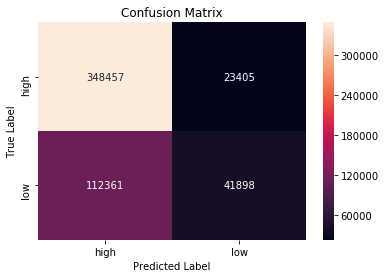

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(dataAll['UsefulnessPolarity'],y_pred)
class_label = [ "high", "low"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
dataAll['tagBycat']=y_pred
dataAll.head()

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs,UsefulnessPolarity,gradefromtext,tagBycat
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0,1,0,0.0
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0,1,0,1.0
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0,1,0,0.0
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0,0,0,0.0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0,0,0,0.0


In [27]:
clfPre = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(X_train_tfidf, train_set['UsefulnessPolarity'])

In [28]:
clfres = clfPre.predict(data_tfidf)

In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# conf_mat = confusion_matrix(dataAll['UsefulnessPolarity'],clfres)
# class_label = [ "high", "low"]
# df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
# sns.heatmap(df, annot = True,fmt="d")
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# #plt.show()

In [36]:
dataAll['tagByClf']=clfres
dataAll.head()

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs,UsefulnessPolarity,gradefromtext,tagBycat,tagByClf
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0,1,0,0.0,0
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0,1,0,1.0,0
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0,1,0,0.0,0
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0,0,0,0.0,0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0,0,0,0.0,0


In [37]:
dataAll.to_csv('dataset/tagwithsentandpre.csv', index=False)